<a href="https://colab.research.google.com/github/Tarunsri1998/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Defining the Path
path='/content/drive/MyDrive/CAPSTONE/Hotel Bookings.csv'

In [ ]:
#Define the dataframe
hotel_df=pd.read_csv(path)

In [ ]:
#Check for the date frame created
hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Here we can see that in 32 columns of this dataframe, 'children', 'country', 'agent', 'company' have NULL VALUES
.

In [ ]:
#Let's create a copy for this DataFrame
df1=hotel_df.copy()

In [ ]:
df1.shape

(119390, 32)

To Understand the meaning of some columns we use 'UNIQUE', when we are unable to understand the meaning of that columns.

In [ ]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df1['is_canceled'].unique()

array([0, 1])

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df1['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

In [ ]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [ ]:
df1['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df1['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [ ]:
df1['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df1['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

**Cleaning data**

Cleaning the data is very important before EDA as it will remove the 'data' which is not clear, which can affect the outcome of EDA


Cleaning will be done in following steps

*  Remove Duplicate Values.
*  Handling Missing Values.
*  Convert Columns to Appropriate datatypes.
*  Adding Some Columns.







**1.Remove Duplicates**

In [ ]:
df1[df1.duplicated()].shape

(31994, 32)

In [30]:
df1.drop_duplicates(inplace=True)

In [31]:
df1.shape

(87396, 32)

**2.Handling Errors and Missing Values**

In [32]:
#Columns having missing values
df1.isnull().sum().sort_values(ascending=False)[:8]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
deposit_type              0
dtype: int64

 Here company and agent columns have company number and agent numbers as data.customer didnt booked hotel via any agent or via any company so there is lot of null values, fill those with '0'

In [33]:
df1[['company','agent']]=df1[['company','agent']].fillna(0)

In [34]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In the column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.So, 'nan' values are the missing values due to error of recording data. We will replace the null values under this column with mean value of children

In [35]:
df1['children'].fillna(df1['children'].mean(),inplace=True)

In column 'country',fill the missing values with 'others'

In [36]:
df1['country'].fillna('others',inplace=True)

In [37]:
#Checking the Null values ate removed or not
df1.isnull().sum().sort_values(ascending=False)[:8]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

 Here some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [38]:
df1[df1['adults']+df1['children']+df1['babies']==0].shape

(166, 32)

In [39]:
df1.drop(df1[df1['adults']+df1['children']+df1['babies']==0].index,inplace=True)

In [40]:
df1.shape


(87230, 32)

**3.Converting some Columns to Required Datatype**

In [41]:
#Converting float datatype to integer datatype
df1[['children','company','agent']]=df1[['children','company','agent']].astype('int64')

In [42]:
#Changing the format of 'reservation_status_date'
df1['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'],format='%Y-%m-%d')

**4.Adding Columns**

Adding the 'total stay' column

In [43]:
df1['total_stay']=df1['stays_in_week_nights']+df1['stays_in_weekend_nights']


Adding the 'total peoples' column

In [44]:
df1['total_people']=df1['adults']+df1['children']+df1['babies']

In [45]:
df1.shape

(87230, 34)

Here we can see 2 columns are added to DataFrame

***EDA***


First find the correlation between Numerical Data.

Column's like 'is_cancelled', 'arrival_data_year', 'arrival_data_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorial data having numerical data type, so we won't need to check them for correlation. 

In [47]:
num_df1=df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

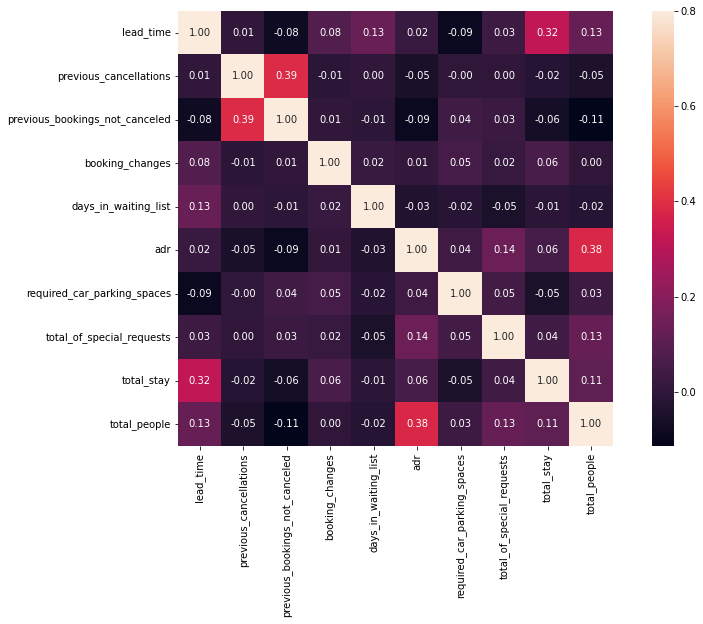

In [51]:
#Correlation Matrix
corrmat=num_df1.corr()
f, ax=plt.subplots(figsize=(14,8))
sns.heatmap(corrmat,annot=True,fmt='.2f',annot_kws={'size':10},vmax=.8,square=True);



*  Lead time and totalstay have slightly correlation. This means for  longer      hotel stay people generally plan little before the actual arrival.


*  Previous cancellation and Previous bookings not cancelled are also slightly correlated.
*  adr is correlated with the total people. This means more number of people means more revenue, so higher adr.



**UNIVARIATE ANALYSIS**

i) Which Agent making more number of bookings

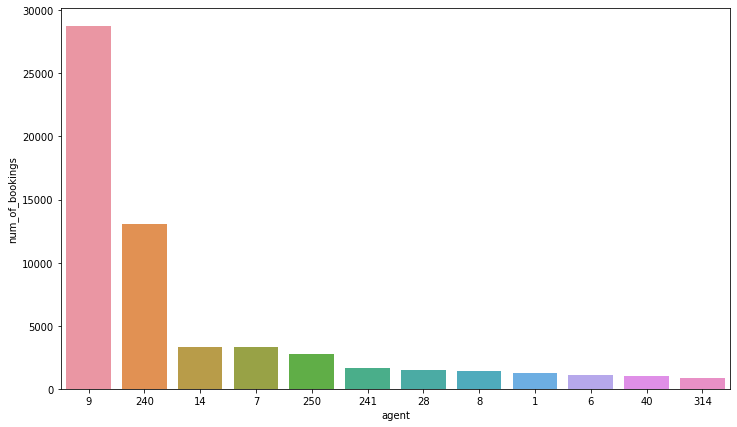

In [56]:
d1=pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'}).sort_values(by='num_of_bookings',ascending=False)
d1.drop(d1[d1['agent']==0].index,inplace=True)            # 0 represents that booking is not made by an agent
d1=d1[:12]                                                # Selecting top 12 performing agents
plt.figure(figsize=(12,7))
sns.barplot(x='agent', y='num_of_bookings',data=d1,order=d1.sort_values('num_of_bookings',ascending=False).agent)


Most number of bookings are made by Agebt No.9

ii) Which Room type is in more Demand.

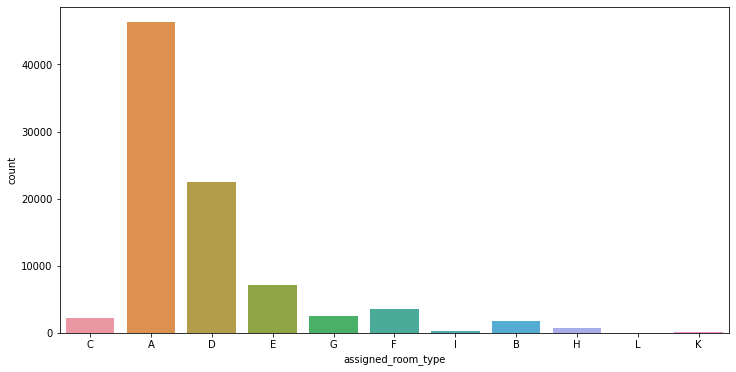

In [58]:
plt.figure(figsize=(12,6))
grp_by_room=df1.groupby('assigned_room_type')
d1['num_of_bookings']=grp_by_room.size()
sns.countplot(x=df1['assigned_room_type'])
plt.show()

Room A is in most demand.

iii) Which is the most preffred Meals from customers.

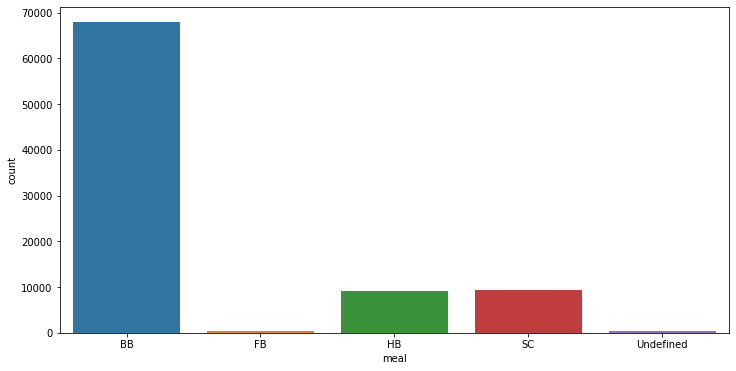

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x=df1['meal'])
plt.show()

The Meal type of BB is more preffered from customers.